### One-way ANOVA

El análisis de varianza de un solo factor, o ANOVA de un solo factor, es una técnica estadística utilizada para determinar si hay diferencias significativas entre las medias de tres o más grupos independientes. En otras palabras, se utiliza para comparar las medias de dos o más grupos para determinar si al menos uno de los grupos difiere significativamente de los demás. Esta técnica es útil cuando se tienen múltiples grupos y se desea determinar si al menos uno de ellos se comporta de manera significativamente diferente en relación con la variable de interés.

El análisis de varianza de un solo factor se lleva a cabo de acuerdo a los siguientes pasos:

1. **Formulación de hipótesis**:
   - Hipótesis nula (H0): $\mu_1 = \mu_2 = \mu_3 = \dots = \mu_k$, donde $\mu_i$ es la media del i-ésimo grupo.
   - Hipótesis alternativa (H1): Al menos una de las medias es diferente de las demás.

2. **Recopilación de datos**: Se recopilan los datos $x_{ij}$, donde $i$ denota el grupo y $j$ denota la observación dentro del grupo.

3. **Verificación de supuestos**: Se verifican los supuestos de normalidad y homogeneidad de varianzas.

4. **Cálculo de la suma de cuadrados total (SCT)**:
   $$SCT = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (x_{ij} - \bar{x}_{\cdot\cdot})^2$$
   Donde $n_i$ es el tamaño del grupo $i$ y $\bar{x}_{\cdot\cdot}$ es la media global.

5. **Cálculo de la suma de cuadrados entre grupos (SCG)**:
   $$SCG = \sum_{i=1}^{k} n_i (\bar{x}_{i\cdot} - \bar{x}_{\cdot\cdot})^2$$
   Donde $\bar{x}_{i\cdot}$ es la media del grupo $i$.

6. **Cálculo de la suma de cuadrados dentro de grupos (SCW)**:
   $$SCW = SCT - SCG$$

7. **Cálculo de grados de libertad (GL)**:
   - Grados de libertad entre grupos: $GL_{\text{entre}} = k - 1$
   - Grados de libertad dentro de grupos: $GL_{\text{dentro}} = N - k$, donde $N$ es el número total de observaciones.

8. **Cálculo de las medias cuadráticas (MC)**:
   - Media cuadrática entre grupos: $MC_{\text{entre}} = \frac{SCG}{GL_{\text{entre}}}$
   - Media cuadrática dentro de grupos: $MC_{\text{dentro}} = \frac{SCW}{GL_{\text{dentro}}}$

9. **Obtención de estadísticas de prueba F**:
   - Estadística de prueba F: $F = \frac{MC_{\text{entre}}}{MC_{\text{dentro}}}$

10. **Toma de decisiones**: Se compara el valor de $F$ con el valor crítico de la distribución F para determinar si se rechaza o no $H0$.

11. **Interpretación de resultados**: Si el valor de $F$ es significativo, se concluye que al menos una de las medias es diferente. Se realiza un análisis post-hoc para identificar cuáles grupos difieren entre sí.

Este proceso proporciona información sobre si existen diferencias significativas entre los grupos y cuáles podrían ser esas diferencias.

### Ejemplo: Uso de redes sociales

Vamos a realizar un análisis de varianza de un solo factor (ANOVA) para investigar si existen diferencias significativas en el tiempo diario de uso de redes sociales entre diferentes grupos raciales. 

Los datos proporcionados contienen los minutos (`MINUTES`) de uso de redes sociales por día se registran junto con la pertenencia al grupo racial (`RACE`). 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
social_media_usage = pd.read_csv("https://raw.githubusercontent.com/marsgr6/estadistica-ux/main/data/sm_usage.csv")
social_media_usage.head()

,AGE,SEX,RACE,MARST,EDUC,MINUTES,EDUCNUM
0,25,Male,White,Single,High School Degree,40,1
1,65,Female,White,Separated/Divorced,Some College,36,2
2,56,Male,White,Single,Four Year Degree,40,3
3,53,Female,White,Married,Some College,37,2
4,51,Female,White,Married,Some College,40,2


La línea de código `social_media_usage.groupby('RACE').describe()['MINUTES']` realiza varias operaciones utilizando el método `groupby` en un DataFrame llamado `social_media_usage`. 

Aquí está la explicación de cada parte de la línea:

1. `social_media_usage.groupby('RACE')`: Esto agrupa los datos en el DataFrame `social_media_usage` por los valores únicos en la columna 'RACE'. Es decir, se están agrupando las filas del DataFrame según los diferentes grupos raciales presentes en la columna 'RACE'.

2. `.describe()`: Este método genera estadísticas descriptivas para cada grupo creado por la operación `groupby`. Estadísticas descriptivas como la media, la desviación estándar, el mínimo, el máximo y los cuartiles se calculan para cada grupo.

3. `['MINUTES']`: Finalmente, se selecciona la columna 'MINUTES' del resultado de la operación `describe()`. Esto devuelve un resumen de estadísticas descriptivas específicamente para la columna 'MINUTES' para cada grupo definido por los valores únicos en la columna 'RACE'.

En resumen, la línea de código proporcionada agrupa los datos por los diferentes grupos raciales, calcula estadísticas descriptivas para la columna 'MINUTES' dentro de cada grupo y devuelve este resumen de estadísticas descriptivas para los minutos de uso de redes sociales para cada grupo racial.

In [5]:
social_media_usage.groupby('RACE').describe()['MINUTES']

,count,mean,std,min,25%,50%,75%,max
RACE,,,,,,,,
American Indian/Aleut/Eskimo,655.0,39.444275,10.570697,0.0,40.0,40.0,40.00,92.0
Asian/Pacific Islander,4043.0,40.402671,10.441899,0.0,40.0,40.0,40.00,110.0
Black,5546.0,40.088172,9.876312,0.0,40.0,40.0,40.00,100.0
Other,820.0,40.735366,11.356772,0.0,40.0,40.0,42.25,99.0
White,41242.0,40.640124,11.398309,0.0,40.0,40.0,45.00,180.0


ANOVA usando `statsmodels`

**Modelo**

```Python
model = ols('MINUTES ~ RACE',  # Model formula
            data = social_media_usage).fit()
```
Esta línea de código utiliza el paquete `statsmodels` en Python para ajustar un modelo de regresión lineal ordinaria (OLS, por sus siglas en inglés). Aquí está la explicación de cada parte:

- `ols('MINUTES ~ RACE'`: Define el modelo de regresión lineal utilizando la fórmula `MINUTES ~ RACE`, donde `MINUTES` es la variable dependiente (la que queremos predecir) y `RACE` es la variable independiente (predictora). La fórmula sigue la convención de R, donde `~` se utiliza para separar la variable dependiente de la variable independiente.
  
- `data = social_media_usage)`: Especifica el conjunto de datos en el que se encuentran las variables `MINUTES` y `RACE`. En este caso, `social_media_usage` es el nombre del DataFrame que contiene los datos.

- `.fit()`: Llama al método `fit()` para ajustar el modelo a los datos. Este método ajusta el modelo de regresión lineal a los datos proporcionados y devuelve un objeto que contiene los resultados del ajuste, incluidos los coeficientes, estadísticas de ajuste y otros detalles del modelo.

Después de ejecutar esta línea de código, la variable `model` contendrá el modelo de regresión lineal ajustado, que se puede utilizar para realizar predicciones, evaluar el ajuste del modelo y obtener estadísticas sobre los coeficientes estimados.

**ANOVA del modelo**

```Python                
anova_result = sm.stats.anova_lm(model, typ=2)
```

Esta línea de código calcula un análisis de varianza (ANOVA) para el modelo de regresión lineal ajustado utilizando el método `anova_lm()` del módulo `statsmodels.stats.anova`. Aquí está la explicación de cada parte:

- `sm.stats.anova_lm(model, typ=2)`: Calcula el ANOVA para el modelo de regresión lineal ajustado (`model`). El parámetro `typ=2` especifica que se utilizará el enfoque de ANOVA tipo 2, que es adecuado para modelos con términos de interacción. Este tipo de ANOVA divide la suma de cuadrados de cada predictor en el modelo en componentes únicas y compartidas, lo que permite evaluar la contribución de cada predictor de manera independiente. El resultado es un DataFrame que contiene las estadísticas de ANOVA, incluidos los valores F, los valores p y otras métricas relacionadas con la significancia estadística de cada predictor en el modelo.

Después de ejecutar esta línea de código, `anova_result` contendrá el DataFrame con los resultados del análisis de varianza, que se puede utilizar para evaluar la significancia estadística de cada predictor en el modelo de regresión lineal.

**Revise:** 
- https://stats.stackexchange.com/questions/175246/why-is-anova-equivalent-to-linear-regression

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MINUTES ~ RACE',  # Model formula
            data = social_media_usage).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq       df         F    PR(>F)
RACE      2.434614e+03      4.0  4.883604  0.000618
Residual  6.518380e+06  52301.0       NaN       NaN


En el análisis de varianza (ANOVA), los términos sum_sq, df, F y PR(>F) representan diferentes aspectos del modelo y la prueba de hipótesis. Aquí está la interpretación de cada uno:

1. **sum_sq (Suma de cuadrados)**: Representa la suma de los cuadrados de las desviaciones de los valores observados de la variable dependiente respecto a su media. Cuanto mayor sea este valor, mayor será la variabilidad total en los datos.

2. **df (Grados de libertad):** Indica el número de categorías menos uno en el factor considerado en el análisis. En el caso de ANOVA, hay dos tipos de grados de libertad: los grados de libertad entre grupos (DF entre) y los grados de libertad dentro de grupos (DF dentro).

3. **F (Estadística de prueba F):** Es la relación de variabilidad entre grupos respecto a la variabilidad dentro de los grupos. Se calcula como el cociente de la variabilidad entre grupos dividida por la variabilidad dentro de los grupos. Un valor alto de F indica que las medias de los grupos son significativamente diferentes entre sí.

4. **PR(>F) (Valor p):** Indica la probabilidad de observar un valor de la estadística F igual o mayor al observado, suponiendo que la hipótesis nula de que no hay diferencia entre los grupos es verdadera. Un valor p pequeño (generalmente < 0.05) sugiere que hay evidencia suficiente para rechazar la hipótesis nula y concluir que hay al menos una diferencia significativa entre los grupos.

En resumen, para interpretar estos resultados, se observa el valor de F y el valor p asociado. Un valor de F grande junto con un valor p pequeño sugiere que hay al menos una diferencia significativa entre los grupos en la variable dependiente.

### Análisis post-hoc

El análisis post-hoc, también conocido como análisis a posteriori, se utiliza en estadística después de realizar pruebas de comparación múltiple, como el análisis de varianza (ANOVA) o las pruebas de hipótesis entre varios grupos. El objetivo del análisis post-hoc es identificar qué grupos específicos son significativamente diferentes entre sí después de que se ha encontrado una diferencia general entre los grupos.

Este análisis implica realizar una serie de comparaciones entre pares de grupos para determinar si existen diferencias significativas en las medias de las variables de interés. Se utilizan diferentes métodos estadísticos, como la prueba de Tukey, la prueba de Bonferroni, la prueba de Scheffé, entre otras, para realizar estas comparaciones.

El análisis post-hoc es importante porque ayuda a evitar conclusiones erróneas al realizar múltiples comparaciones. Ayuda a identificar qué comparaciones específicas son significativas y cuáles no lo son, lo que proporciona una comprensión más precisa de las diferencias entre grupos en un estudio.

### Pairwise TukeyHSD

El método pairwise TukeyHSD (Tukey Honest Significant Differences) es una técnica comúnmente utilizada en análisis post-hoc para comparar todas las combinaciones posibles entre los grupos en un ANOVA (Análisis de Varianza). Su objetivo es identificar diferencias significativas entre las medias de los grupos después de haber realizado una prueba global de diferencia entre ellos.

La prueba TukeyHSD compara todas las posibles combinaciones de pares de grupos y calcula intervalos de confianza ajustados para la diferencia entre las medias de cada par. Luego, determina si estas diferencias son estadísticamente significativas en función de la variabilidad dentro de los grupos y el tamaño total de la muestra.

La ventaja del método TukeyHSD es su capacidad para controlar el error de tipo I cuando se realizan múltiples comparaciones. Al ajustar los intervalos de confianza para cada comparación, ayuda a mantener un nivel global de significancia, reduciendo así la probabilidad de falsos positivos.

TukeyHSD es una herramienta útil para identificar qué combinaciones específicas de grupos difieren significativamente entre sí después de realizar un ANOVA, proporcionando una comprensión más detallada de las diferencias entre grupos en un estudio.

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=social_media_usage.MINUTES,     # Data
                          groups=social_media_usage.RACE,   # Groups
                          alpha=0.1)          # Significance level

tukey.summary()  

group1,group2,meandiff,p-adj,lower,upper,reject
American Indian/Aleut/Eskimo,Asian/Pacific Islander,0.9584,0.2477,-0.1981,2.1149,False
American Indian/Aleut/Eskimo,Black,0.6439,0.6303,-0.4906,1.7784,False
American Indian/Aleut/Eskimo,Other,1.2911,0.1771,-0.1479,2.73,False
American Indian/Aleut/Eskimo,White,1.1958,0.0511,0.1145,2.2772,True
Asian/Pacific Islander,Black,-0.3145,0.6519,-0.8823,0.2533,False
Asian/Pacific Islander,Other,0.3327,0.937,-0.719,1.3843,False
Asian/Pacific Islander,White,0.2375,0.697,-0.2151,0.69,False
Black,Other,0.6472,0.5301,-0.3801,1.6745,False
Black,White,0.552,0.005,0.1592,0.9447,True
Other,White,-0.0952,0.9992,-1.0636,0.8731,False


La salida de la prueba TukeyHSD proporciona información sobre las diferencias significativas entre los grupos comparados. Aquí está la interpretación de cada columna:

- **group1 y group2:** Los grupos que se están comparando.
- **meandiff:** La diferencia promedio entre las medias de los grupos comparados.
- **p-adj:** El valor de p ajustado para controlar el error de tipo I debido a las múltiples comparaciones. Si este valor es menor que el nivel de significancia establecido (0.10 en este caso), se considera que la diferencia es estadísticamente significativa.
- **lower:** El límite inferior del intervalo de confianza para la diferencia de medias.
- **upper:** El límite superior del intervalo de confianza para la diferencia de medias.
- **reject:** Indica si se rechaza la hipótesis nula de que no hay diferencia entre las medias de los grupos.
  - Si `reject` es True, significa que la diferencia entre las medias es estadísticamente significativa y se rechaza la hipótesis nula.

Esta salida le proporciona información sobre qué pares de grupos tienen diferencias significativas en sus medias, ayudándole a identificar qué grupos difieren entre sí después de realizar el ANOVA.

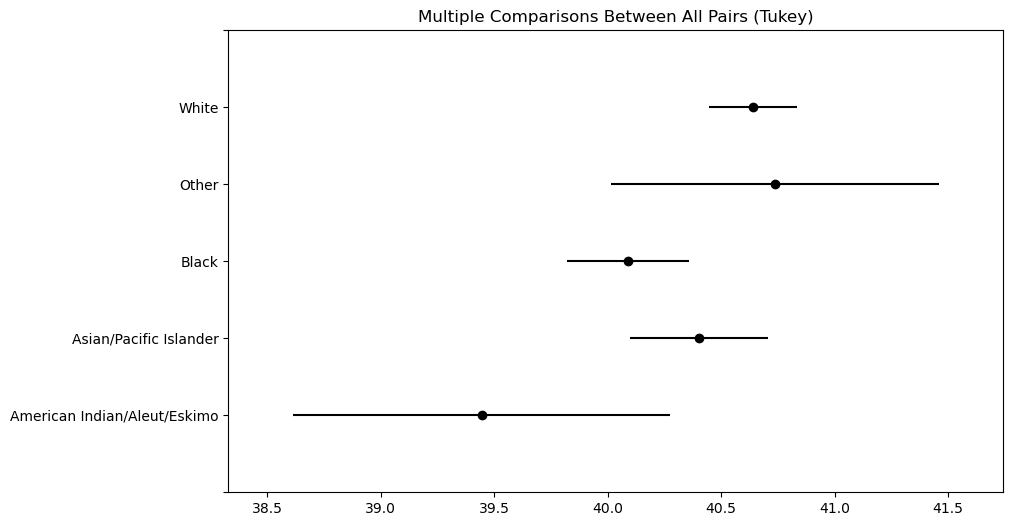

In [6]:
tukey.plot_simultaneous();    # Plot group confidence intervals

La función `tukey.plot_simultaneous()` genera un gráfico que muestra los intervalos de confianza simultáneos para las medias de cada grupo. Aquí está la interpretación:

- Cada línea en el gráfico representa un grupo y el segmento de la línea representa el intervalo de confianza para la media de ese grupo.
- Donde los intervalos de confianza no se superponen, hay una diferencia significativa entre las medias de los grupos correspondientes.
- Si los intervalos de confianza se superponen, no hay una diferencia significativa entre las medias de esos grupos.
- Los grupos cuyos intervalos de confianza no se superponen indican diferencias significativas entre ellos, mientras que los grupos cuyos intervalos de confianza se superponen indican que no hay diferencias significativas entre ellos.

Este gráfico proporciona una representación visual de las diferencias significativas entre las medias de los grupos, lo que facilita la identificación de grupos que difieren entre sí después de realizar el ANOVA.

- **Como ejercicio realice un ANOVA para las otras columnas categóricas que considere de interés.**

### Ejemplo: Evaluar modelos de clasificación

Se realizó un análisis de varianza (ANOVA) para investigar si hay diferencias significativas en el **accuracy** de diferentes tipos de modelos de clasificación para detectar humedad en granos de arroz. El factor independiente fue el tipo de modelo de clasificación, mientras que la variable dependiente fue la precisión del modelo (medida como la tasa de clasificación correcta). Se recopiló un conjunto de datos que incluye múltiples modelos de clasificación **RFC** (Random Forest Classifier), **RFR** (Random Forest Regressor), **XGBC** (eXtreme Gradient Boosting Classifier), **XGBR** (eXtreme Gradient Boosting Regressor) y se calculó la precisión de cada modelo mediante validación cruzada u otra técnica de evaluación de modelos. 

La "accuracy" en un modelo de clasificación es una medida que indica la proporción de instancias correctamente clasificadas respecto al total de instancias en el conjunto de datos. En otras palabras, es la cantidad de predicciones correctas dividida por el número total de predicciones realizadas por el modelo. Se expresa comúnmente como un porcentaje, donde una precisión del 100% indicaría que todas las predicciones del modelo fueron correctas.

La fórmula para calcular la accuracy es:

$$
\text{accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}
$$

La precisión es una de las métricas más utilizadas para evaluar el rendimiento de un modelo de clasificación, especialmente cuando las clases están balanceadas en el conjunto de datos. 

El análisis de ANOVA se utilizó para determinar si hay una diferencia significativa en la precisión entre los diferentes tipos de modelos de clasificación.

**Revise:** 
  - https://www.mdpi.com/2073-4395/12/12/3021

La línea de código `data.groupby('model').describe()['accuracy']` realiza varias operaciones utilizando el método `groupby` en un DataFrame llamado `data`. Aquí está la explicación de cada parte de la línea:

1. `data.groupby('model')`: Esto agrupa los datos en el DataFrame `data` por los valores únicos en la columna 'model'. Es decir, se están agrupando las filas del DataFrame según los diferentes modelos presentes en la columna 'model'.

2. `.describe()`: Este método genera estadísticas descriptivas para cada grupo creado por la operación `groupby`. Estadísticas descriptivas como la media, la desviación estándar, el mínimo, el máximo y los cuartiles se calculan para cada grupo.

3. `['accuracy']`: Finalmente, se selecciona la columna 'accuracy' del resultado de la operación `describe()`. Esto devuelve un resumen de estadísticas descriptivas específicamente para la columna 'accuracy' para cada grupo definido por los valores únicos en la columna 'model'.

La línea de código proporcionada agrupa los datos por los diferentes modelos, calcula estadísticas descriptivas para la columna 'accuracy' dentro de cada grupo y devuelve este resumen de estadísticas descriptivas para la precisión de cada modelo.

In [9]:
data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/estadistica-ux/main/data/model_evaluation.csv")

data.groupby('model').describe()['accuracy']

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
RFC,60.0,0.850938,0.099096,0.636364,0.772727,0.863636,0.952381,1.000000
RFR,60.0,0.799964,0.129825,0.454545,0.727273,0.857143,0.904762,1.000000
XGBC,60.0,0.845238,0.091984,0.619048,0.800325,0.863636,0.909091,1.000000
XGBR,60.0,0.766775,0.139942,0.318182,0.670455,0.818182,0.863636,0.954545


In [10]:
model = ols('accuracy ~ model',  # Model formula
            data = data).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

            sum_sq     df         F    PR(>F)
model     0.285330    3.0  6.952584  0.000167
Residual  3.228434  236.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
RFC,RFR,-0.051,0.0823,-0.1062,0.0043,False
RFC,XGBC,-0.0057,0.9933,-0.061,0.0496,False
RFC,XGBR,-0.0842,0.0006,-0.1394,-0.0289,True
RFR,XGBC,0.0453,0.1497,-0.01,0.1005,False
RFR,XGBR,-0.0332,0.4069,-0.0884,0.0221,False
XGBC,XGBR,-0.0785,0.0017,-0.1337,-0.0232,True


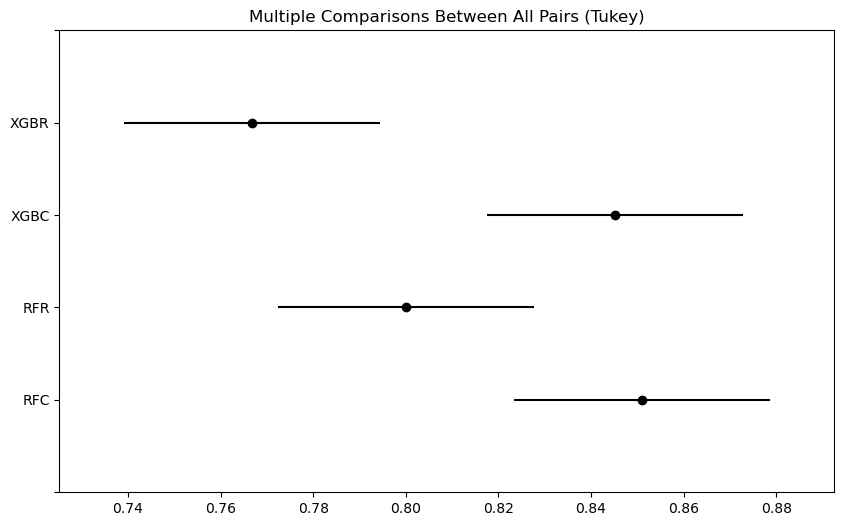

In [11]:
tukey = pairwise_tukeyhsd(endog=data.accuracy,     # Data
                          groups=data.model,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()   

Las características globales de las imágenes son aquellas que se calculan considerando la imagen completa en lugar de regiones específicas de la misma. Cada uno de los acrónimos proporcionados probablemente represente un tipo diferente de característica global de imagen:

1. GLCM (Matriz de co-ocurrencia de niveles de gris): Aunque la GLCM a menudo se asocia con características locales, también se pueden derivar características globales de esta matriz.

2. GRAY_CH (Canal de grises): Puede representar características globales calculadas en la escala de grises de la imagen completa.

3. HRLK (Histograma de lados de la región): Podría referirse a un descriptor global que captura la distribución de los lados de la región en toda la imagen.

4. HSV_CH (Canal de espacio de color HSV): Se refiere a características globales calculadas en los componentes de matiz, saturación y valor del espacio de color HSV en toda la imagen.

5. LBP (Patrones binarios locales): Aunque LBP se asocia comúnmente con características locales, también se pueden derivar características globales de los patrones LBP en toda la imagen.

6. RGB_CH (Canal de espacio de color RGB): Se refiere a características globales calculadas en los componentes rojo, verde y azul del espacio de color RGB en toda la imagen.

Estas características globales se utilizan para describir la imagen en su conjunto y pueden capturar información sobre el color, la textura, la forma y otros aspectos importantes de la imagen completa.

- Vamos a filtrar los datos para el feagure LBP y realizar nuestro análisis de varianza.

In [12]:
np.unique(data.features)

array(['GLCM', 'GRAY_CH', 'HRLK', 'HSV_CH', 'LBP', 'RGB_CH'], dtype=object)

In [20]:
gray_ch = data.query('features == "LBP"')
gray_ch.groupby('model').describe()['accuracy']

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
RFC,10.0,0.739177,0.101207,0.636364,0.681818,0.681818,0.772727,0.952381
RFR,10.0,0.586580,0.101031,0.454545,0.511364,0.558442,0.670455,0.727273
XGBC,10.0,0.756061,0.089052,0.636364,0.681818,0.727273,0.852273,0.863636
XGBR,10.0,0.532468,0.090949,0.318182,0.500000,0.534632,0.590909,0.636364


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('accuracy ~ model',  # Model formula
            data = gray_ch).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

            sum_sq    df          F    PR(>F)
model     0.369864   3.0  13.454942  0.000005
Residual  0.329869  36.0        NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
RFC,RFR,-0.1526,0.0055,-0.2679,-0.0373,True
RFC,XGBC,0.0169,0.9789,-0.0984,0.1322,False
RFC,XGBR,-0.2067,0.0001,-0.322,-0.0914,True
RFR,XGBC,0.1695,0.0018,0.0542,0.2848,True
RFR,XGBR,-0.0541,0.5912,-0.1694,0.0612,False
XGBC,XGBR,-0.2236,0.0,-0.3389,-0.1083,True


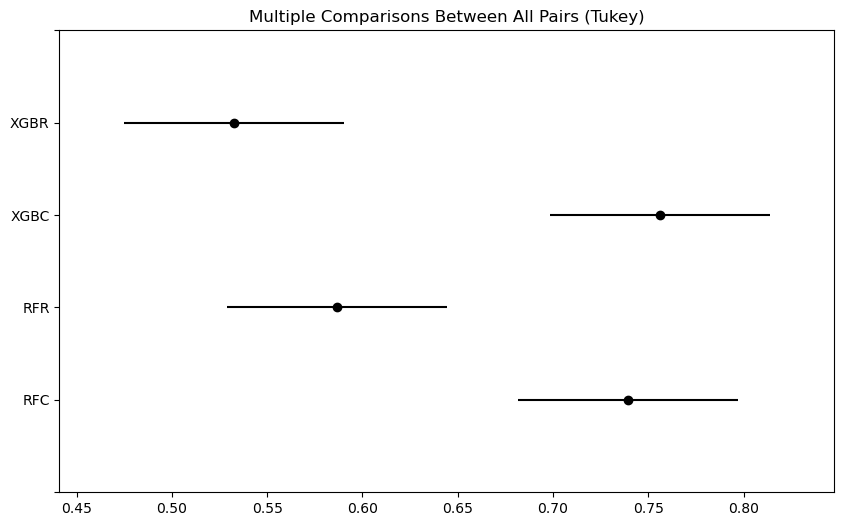

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=gray_ch.accuracy,     # Data
                          groups=gray_ch.model,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()

### Supuestos

En un análisis de varianza (ANOVA), los supuestos fundamentales son:

1. **Independencia de las observaciones:** Se asume que las observaciones dentro de cada grupo son independientes entre sí y que no hay relación sistemática entre las observaciones de un grupo y otro.

2. **Normalidad de los residuos:** Se asume que los residuos (diferencias entre los valores observados y los valores predichos) siguen una distribución normal. Esto significa que los datos en cada grupo siguen una distribución normal.

3. **Homogeneidad de las varianzas:** Se supone que las varianzas de las muestras en todos los grupos son iguales. Esto implica que la variabilidad dentro de cada grupo es similar en todos los grupos.

Estos supuestos son importantes para garantizar la validez de los resultados del ANOVA. Si alguno de estos supuestos no se cumple, los resultados del análisis pueden ser sesgados o poco confiables. Se pueden realizar pruebas y diagnósticos estadísticos para evaluar si se cumplen estos supuestos antes de interpretar los resultados del ANOVA.

- **Revise:** https://www.pythonfordatascience.org/anova-python/#assumption_check


### Independencia

Esta suposición se prueba al diseñar el estudio. Lo que esto significa es que todos los grupos son mutuamente excluyentes, es decir, un individuo solo puede pertenecer a un grupo. Además, esto significa que los datos no son medidas repetidas (no se recopilan a lo largo del tiempo). En nuestros ejemplos, esta condición se cumple.

### Normalidad

La suposición de normalidad se prueba en los residuos del modelo cuando proviene de un marco de ANOVA o regresión. Un método para probar la suposición de normalidad es la prueba de Shapiro-Wilk. Esto se puede completar utilizando el método shapiro() de scipy.stats.

El test de Shapiro-Wilk es una prueba de normalidad que evalúa si una muestra proviene de una distribución normal. La hipótesis nula es que los datos están distribuidos normalmente. El estadístico de prueba, denotado como $W$, se calcula a partir de las covarianzas entre los valores ordenados y los esperados bajo la hipótesis nula. Si el valor p asociado al estadístico de prueba es menor que el nivel de significancia elegido (generalmente 0.05), se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal. En resumen, el test de Shapiro-Wilk proporciona una medida de qué tan bien se ajustan los datos a una distribución normal, con valores pequeños de $W$ indicando desviaciones significativas de la normalidad.

El test de Shapiro-Wilk utiliza la siguiente fórmula para calcular el estadístico de prueba, denotado como $ W $:

$$ W = \frac{(\sum_{i=1}^{n} a_i x_{(i)})^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $$

Donde:
- $ n $ es el tamaño de la muestra.
- $ x_{(i)} $ es el i-ésimo valor más pequeño en la muestra ordenada.
- $ x_i $ es el i-ésimo valor de la muestra.
- $ \bar{x} $ es la media de la muestra.
- $ a_i $ son los coeficientes específicos para el cálculo del estadístico de prueba, que dependen del tamaño de la muestra y están tabulados para diferentes tamaños de muestra.

Una vez calculado $ W $, se compara con un valor crítico de la distribución de probabilidad bajo la hipótesis nula de normalidad para obtener el valor p asociado. Si el valor p es menor que el nivel de significancia elegido (generalmente 0.05), se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.

In [16]:
import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9741586446762085, pvalue=0.4821881353855133)

El resultado de Shapiro consiste en dos partes: el estadístico de prueba W y el valor p.

- El estadístico de prueba (statistic) es un número que se calcula durante la prueba de normalidad de Shapiro-Wilk. En este caso, el valor es aproximadamente 0.974.

- El valor p (p-value) es la probabilidad de observar un estadístico de prueba al menos tan extremo como el observado, si la hipótesis nula fuera verdadera. En este caso, el valor p es aproximadamente 0.482.

En términos de interpretación, si el valor p es mayor que el nivel de significancia (generalmente 0.05), no hay evidencia suficiente para rechazar la hipótesis nula de normalidad. Por lo tanto, en este caso, con un valor p de aproximadamente 0.482, no hay suficiente evidencia para rechazar la hipótesis nula de normalidad, lo que sugiere que los datos pueden provenir de una distribución normal.

### Homogeneidad de las varianzas

El supuesto final es que todos los grupos tienen varianzas iguales. Un método para probar este supuesto es el test de Levene para la homogeneidad de varianzas. Esto se puede realizar utilizando el método `levene()` de `Scipy.stats`.

La prueba de Levene se utiliza para evaluar si las varianzas de varios grupos son estadísticamente iguales o diferentes. En otras palabras, se utiliza para probar la homogeneidad de las varianzas entre los grupos. La prueba compara las varianzas de los grupos y determina si existe una diferencia significativa entre ellas. Si el valor p asociado con la prueba de Levene es menor que un umbral predefinido (generalmente 0.05), se rechaza la hipótesis nula de homogeneidad de varianzas, lo que sugiere que al menos una de las varianzas de los grupos es significativamente diferente de las demás. Por otro lado, si el valor p es mayor que el umbral, se acepta la hipótesis nula y se concluye que las varianzas de los grupos son similares.

La prueba de Levene compara la magnitud de las desviaciones de las observaciones dentro de cada grupo respecto a la media del grupo, utilizando una medida de dispersión. La fórmula matemática para el estadístico de Levene es:

$$ W = \frac{(N-k)}{(k-1)} \frac{\sum_{i=1}^{k} N_i (\bar{z}_{i\cdot} - \bar{z}_{\cdot\cdot})^2}{\sum_{i=1}^{k} \sum_{j=1}^{N_i} (z_{ij} - \bar{z}_{i\cdot})^2} $$

Donde:
- $ N $ es el número total de observaciones.
- $ k $ es el número de grupos.
- $ N_i $ es el número de observaciones en el grupo $ i $.
- $ \bar{z}_{i\cdot} $ es la media de las observaciones en el grupo $ i $.
- $ \bar{z}_{\cdot\cdot} $ es la media de todas las observaciones.
- $ z_{ij} $ es la observación $ j $ en el grupo $ i $.

El estadístico $ W $ sigue una distribución chi-cuadrado con $ k-1 $ grados de libertad, donde $ k $ es el número de grupos.

In [26]:
stats.levene(gray_ch['accuracy'][gray_ch['model'] == 'RFC'],
             gray_ch['accuracy'][gray_ch['model'] == 'RFR'],
             gray_ch['accuracy'][gray_ch['model'] == 'XGBC'],
             gray_ch['accuracy'][gray_ch['model'] == 'XGBR'])

LeveneResult(statistic=0.12236192277137319, pvalue=0.9463197735551776)

El resultado de la prueba de Levene consiste en dos valores:

- El estadístico de Levene, que en este caso es aproximadamente \(0.122\).
- El valor p asociado a este estadístico, que en este caso es aproximadamente \(0.946\).

Interpretación:
- El estadístico de Levene es una medida de la diferencia de varianzas entre los grupos. Cuanto menor sea este valor, más similar será la varianza entre los grupos.
- El valor p es la probabilidad de observar un estadístico de prueba igual o más extremo que el observado si la hipótesis nula fuera verdadera. En este caso, como el valor p es mayor que un nivel de significancia típico como 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que las varianzas entre los grupos son iguales.

Basados en este resultado, no hay evidencia para sugerir que las varianzas entre los grupos sean diferentes.

Podemos evaluar la varianza entre grupos de forma gráfica.

<Axes: xlabel='accuracy', ylabel='Density'>

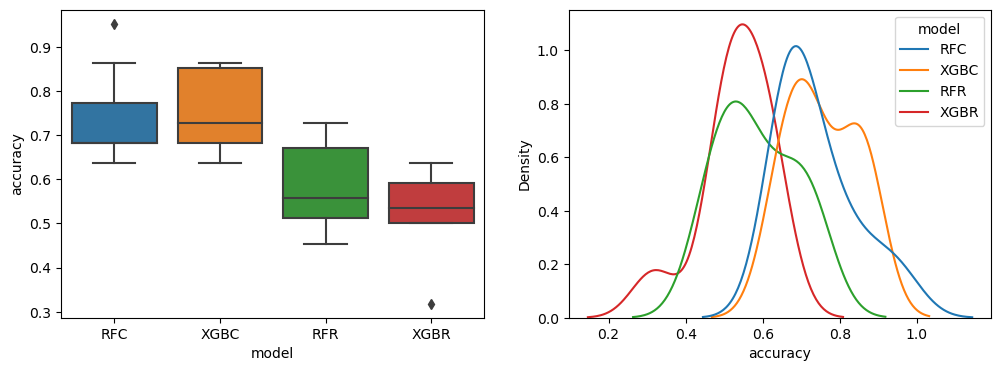

In [34]:
import seaborn as sns

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(data=gray_ch, x="model", y="accuracy")
plt.subplot(1,2,2)
sns.kdeplot(data=gray_ch, hue="model", x="accuracy")

### Kruskal-Wallis

La prueba de Kruskal-Wallis es una prueba no paramétrica utilizada para determinar si hay diferencias significativas entre tres o más grupos independientes en una variable ordinal o continua. Se utiliza como una alternativa a la prueba de ANOVA cuando los datos no cumplen con los supuestos de normalidad y homogeneidad de varianza necesarios para la prueba de ANOVA.

La prueba de Kruskal-Wallis clasifica los valores de la variable dependiente en cada grupo y luego evalúa si las medianas de estos rangos son significativamente diferentes entre los grupos. Si el valor p obtenido es menor que un nivel de significancia predefinido (generalmente 0.05), se rechaza la hipótesis nula y se concluye que hay al menos una diferencia significativa entre

La prueba de Kruskal-Wallis utiliza los rangos de las observaciones dentro de cada grupo para determinar si las medianas de estos rangos son iguales o diferentes entre los grupos. Aquí está la descripción matemática de la prueba:

1. **Hipótesis nula (H0):** Las medianas de los grupos son iguales.
2. **Hipótesis alternativa (H1):** Al menos una mediana de grupo es diferente de las demás.

El estadístico de la prueba se calcula de la siguiente manera:

$$
H = \frac{{12}}{{N(N+1)}} \left[ \sum_{i=1}^{k} \frac{{R_i^2}}{{n_i}} \right] - 3(N+1)
$$

Donde:
- $ H $ es el estadístico de la prueba.
- $ N $ es el número total de observaciones en todos los grupos combinados.
- $ k $ es el número de grupos.
- $ R_i $ es la suma de los rangos de los elementos del grupo $ i $.
- $ n_i $ es el tamaño del grupo $ i $.

El estadístico $ H $ sigue una distribución chi-cuadrado con $ k - 1 $ grados de libertad. Se compara el valor $ H $ calculado con el valor crítico de la distribución chi-cuadrado para determinar si se rechaza la hipótesis nula.

El valor $ p $ se calcula a partir del estadístico $ H $ y se compara con el nivel de significancia predefinido para tomar una decisión sobre la hipótesis nula. Si el valor $ p $ es menor que el nivel de significancia, se rechaza la hipótesis nula y se concluye que hay al menos una diferencia significativa entre las medianas de los grupos.

In [35]:
stats.kruskal(gray_ch['accuracy'][gray_ch['model'] == 'RFC'],
              gray_ch['accuracy'][gray_ch['model'] == 'RFR'],
              gray_ch['accuracy'][gray_ch['model'] == 'XGBC'],
              gray_ch['accuracy'][gray_ch['model'] == 'XGBR'])

KruskalResult(statistic=22.300037807183358, pvalue=5.649482897910132e-05)

La salida de la prueba de Kruskal-Wallis proporciona dos valores importantes:

1. **Estadístico de prueba (H):** En este caso, el estadístico de prueba es 22.30.
   - Este valor indica la magnitud de la diferencia entre los grupos en términos de sus rangos de observaciones. Valores más altos indican una mayor diferencia entre los grupos.
   
2. **Valor p (p-value):** El valor $p$ asociado con el estadístico de prueba es $5.65 \times 10^{-5}$.
   - Este valor representa la probabilidad de observar el estadístico de prueba calculado, o uno más extremo, bajo la hipótesis nula de que las medianas de los grupos son iguales.
   - Si el valor p es menor que el nivel de significancia elegido (por ejemplo, 0.05), se rechaza la hipótesis nula en favor de la alternativa, lo que indica que al menos un grupo difiere significativamente de los demás.

En este caso, el valor $p$ es extremadamente bajo, lo que sugiere que hay evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, podemos concluir que al menos uno de los grupos tiene una mediana diferente de los demás.

### Post Hoc Dunn test

El Dunn test, también conocido como prueba de comparaciones múltiples de Dunn, es una prueba no paramétrica utilizada para realizar comparaciones múltiples entre grupos después de encontrar una diferencia significativa en un análisis de varianza no paramétrico, como el test de Kruskal-Wallis. Esta prueba ayuda a identificar cuáles grupos difieren significativamente entre sí después de rechazar la hipótesis nula en el análisis de Kruskal-Wallis.

Aquí hay una breve explicación de cómo funciona el Dunn test:

1. **Rangos de observación:** Primero, se asignan rangos a todas las observaciones de los grupos combinados. Esto se hace independientemente de a qué grupo pertenezca cada observación.

2. **Cálculo de las diferencias de rangos:** Luego, se calculan las diferencias de rangos entre todas las parejas de observaciones.

3. **Ajuste de rangos:** Los rangos se ajustan para tener en cuenta el tamaño de las muestras y se suman para cada grupo.

4. **Cálculo de las diferencias promedio de rangos:** Se calculan las diferencias promedio de rangos entre cada par de grupos.

5. **Corrección de Bonferroni:** Finalmente, se aplica una corrección de Bonferroni para ajustar los valores p obtenidos de las comparaciones múltiples.

El Dunn test es una herramienta útil para identificar qué grupos difieren significativamente entre sí después de encontrar una diferencia global significativa en un análisis de varianza no paramétrico. Es especialmente útil cuando se tienen más de dos grupos y se necesita determinar exactamente cuáles difieren entre sí.

**Requisitos**

```Python
!pip install scikit_posthocs
```

In [45]:
import scikit_posthocs as sp

data = [gray_ch['accuracy'][gray_ch['model'] == 'RFC'],
        gray_ch['accuracy'][gray_ch['model'] == 'RFR'],
        gray_ch['accuracy'][gray_ch['model'] == 'XGBC'],
        gray_ch['accuracy'][gray_ch['model'] == 'XGBR']]
            
dunn_result = sp.posthoc_dunn(data, p_adjust = 'bonferroni')
dunn_result.columns = ['RFC', 'RFR', 'XGBC', 'XGBR']
dunn_result.index = ['RFC', 'RFR', 'XGBC', 'XGBR']
dunn_result

,RFC,RFR,XGBC,XGBR
RFC,1.000000,0.048363,1.000000,0.001841
RFR,0.048363,1.000000,0.021115,1.000000
XGBC,1.000000,0.021115,1.000000,0.000631
XGBR,0.001841,1.000000,0.000631,1.000000


La tabla de salida de `sp.posthoc_dunn` proporciona los valores de p corregidos después de realizar comparaciones múltiples entre todos los pares de grupos utilizando el Dunn test. Aquí hay una guía para interpretar esta tabla:

- **Filas y columnas:** Cada fila y columna representa un grupo diferente o una combinación de grupos.
- **Celda de intersección:** Cada celda de la tabla muestra el valor p corregido que resulta de comparar los grupos en la fila con los grupos en la columna correspondiente.
- **Valores p corregidos:** Los valores p corregidos indican la significancia estadística de la diferencia entre los grupos comparados. Un valor p menor que el nivel de significancia predeterminado (generalmente 0.05) sugiere que hay una diferencia significativa entre los grupos comparados.

Para interpretar la tabla:
- Busca valores p significativamente bajos (generalmente < 0.05) en la tabla, lo que indica diferencias significativas entre los grupos correspondientes.
- Cuando encuentres un valor p significativo, identifica qué grupos están involucrados en la comparación mirando los encabezados de filas y columnas.

La tabla de salida del Dunn test te permite identificar qué grupos difieren significativamente entre sí después de realizar comparaciones múltiples, lo que ayuda a comprender mejor las diferencias en tus datos entre los grupos analizados.

- **Discute:** Cuales modelos 